In [ ]:
!gdown https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip

Downloading...
From: https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
To: /content/student.zip
100% 20.5k/20.5k [00:00<00:00, 2.75MB/s]


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip student.zip

Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


In [ ]:
data = pd.read_csv('student-mat.csv',sep=';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Check null

In [ ]:
data.isnull().sum().sum()

0

Data is not included null value

###Statistic features

In [ ]:
#seperate data into 2 groups (category and numeric) for analyzing
categor_features = []
numer_features = []
for col in data.columns:
  if data.dtypes[col] == object:
    categor_features.append(col)
  else:
    numer_features.append(col)

print(len(categor_features),len(numer_features))

17 16


In [ ]:
print(numer_features)

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [ ]:
print(categor_features)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


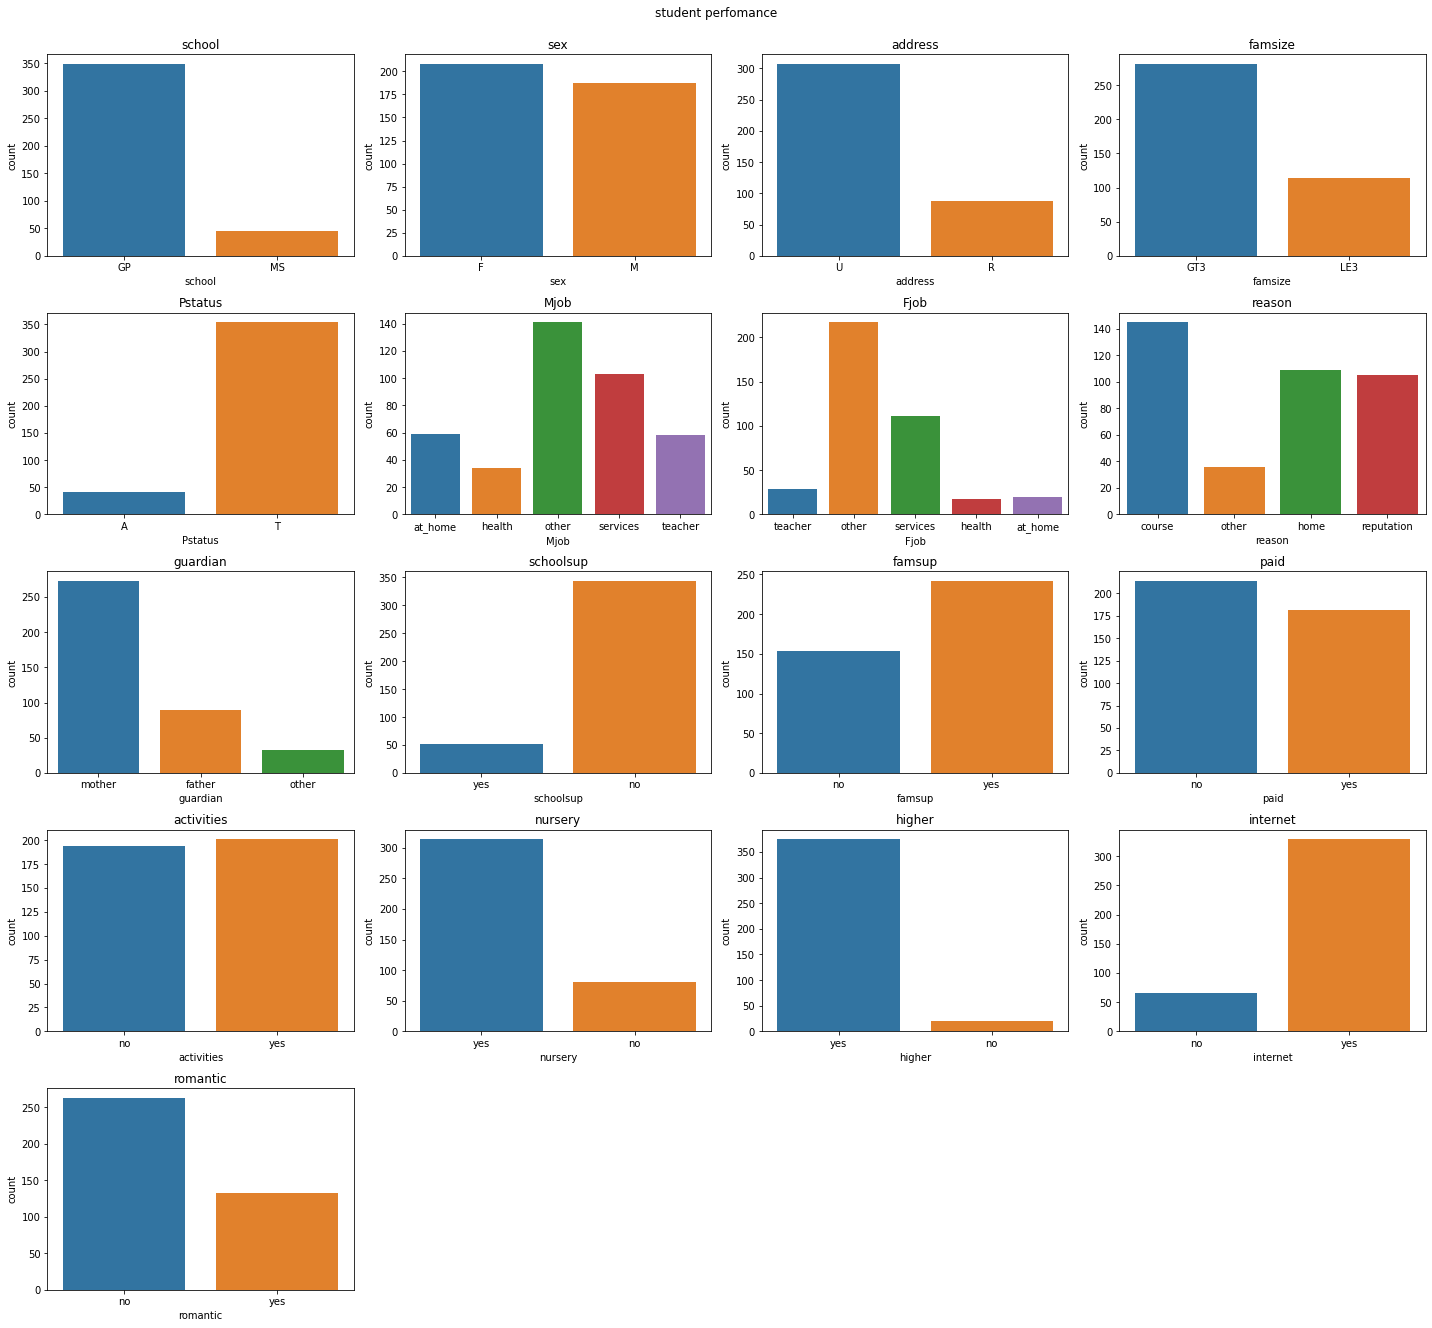

In [ ]:
# plots for category feature
from matplotlib.pyplot import figure
fig = plt.figure(figsize = (20, 22))
j = 0
for fea in categor_features:
    ax = plt.subplot(6, 4, j+1)
    j += 1
    sns.countplot(x=fea,data=data,ax = ax)
    plt.title(fea)
fig.suptitle('student perfomance')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()



In [ ]:
def nbox_plot(names, size):
  plt.figure(figsize=(16,12))
  for i,name in enumerate(names):
    plt.subplot(size[0], size[1], i+1)
    sns.boxplot(x=name, y='G3', data=data)
    plt.tight_layout()

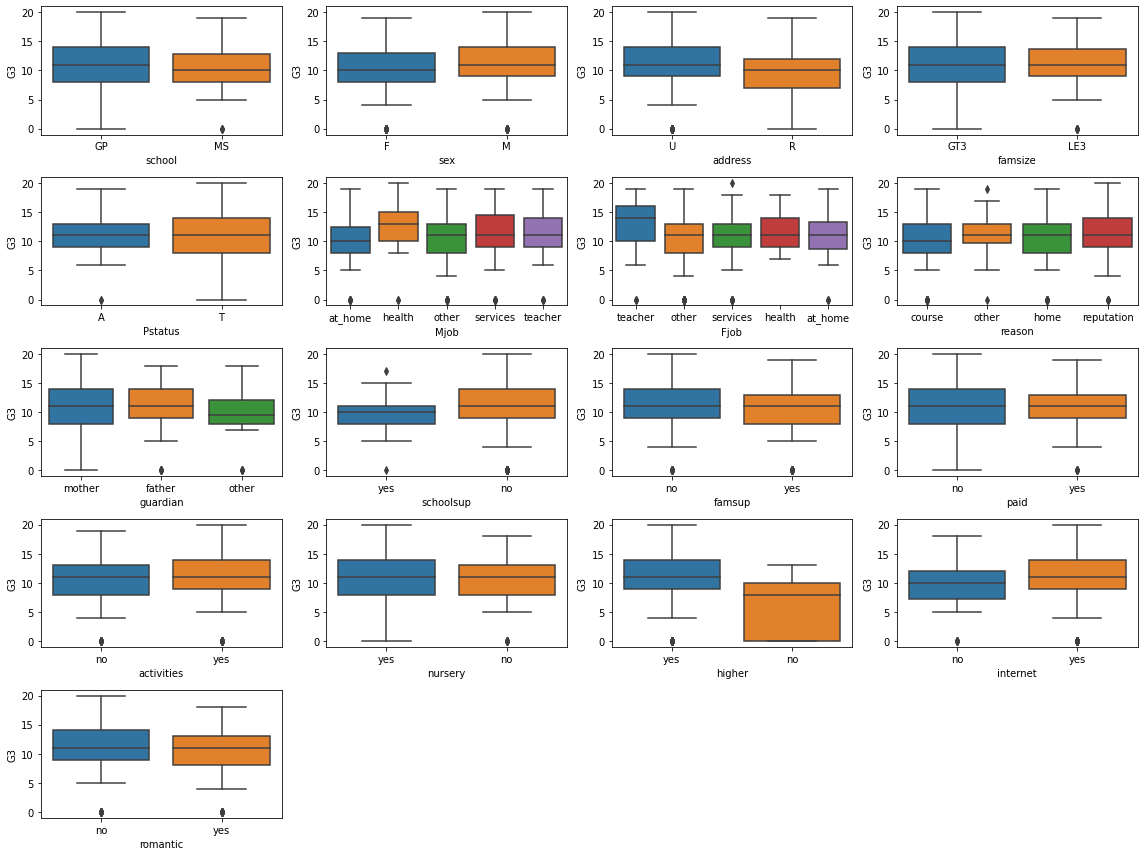

In [ ]:
nbox_plot(categor_features,(5,4))

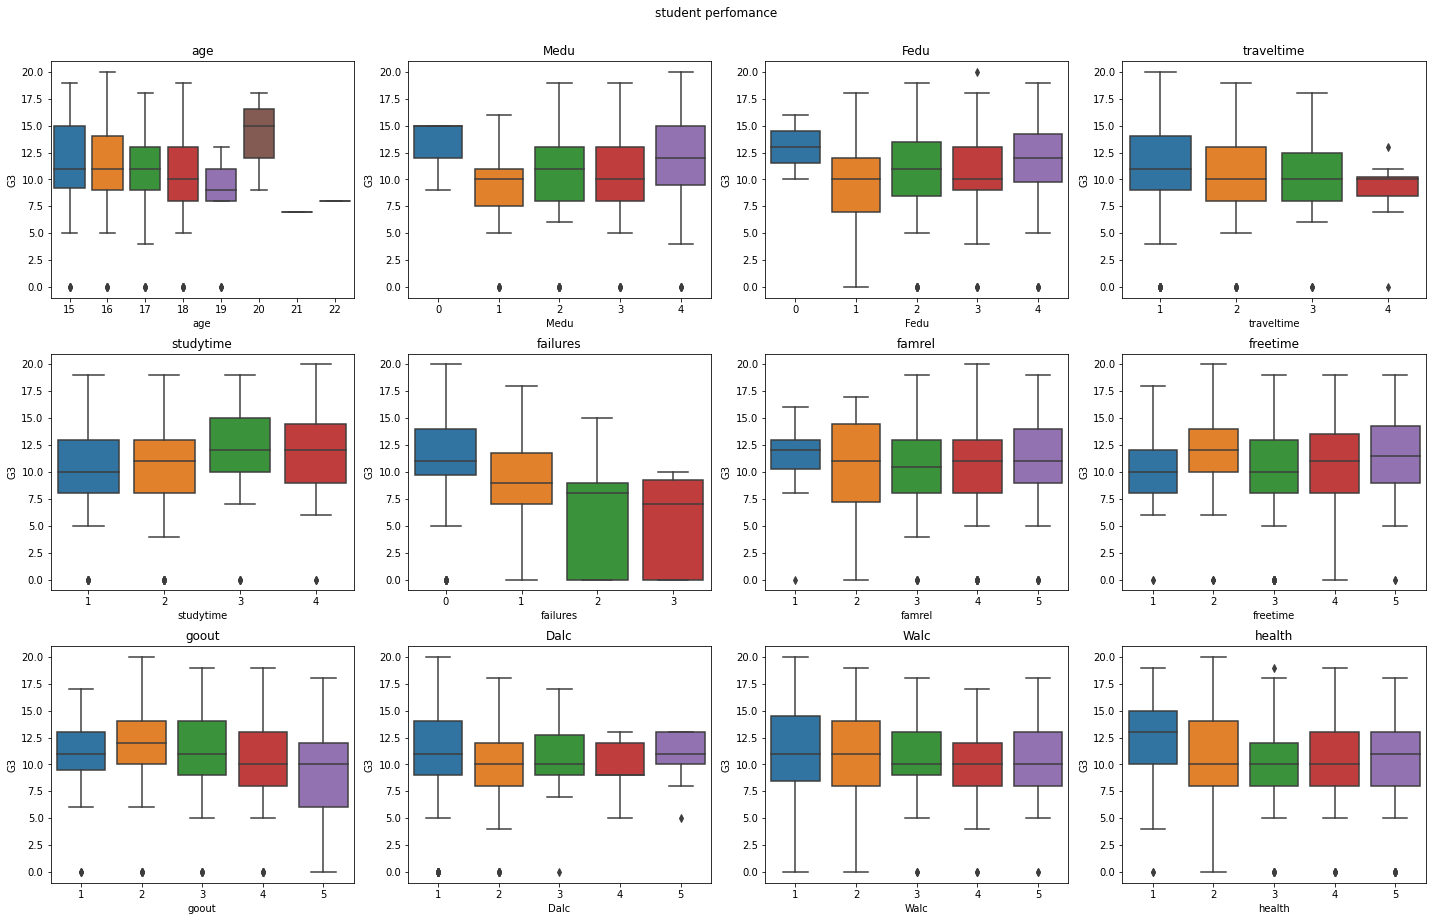

In [ ]:
# plots for numeric feature
from matplotlib.pyplot import figure
fig = plt.figure(figsize = (20, 25))
j = 0
for fea in numer_features[:-4]:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.boxplot(x=fea,y="G3",data=data)
    plt.title(fea)
fig.suptitle('student perfomance')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()



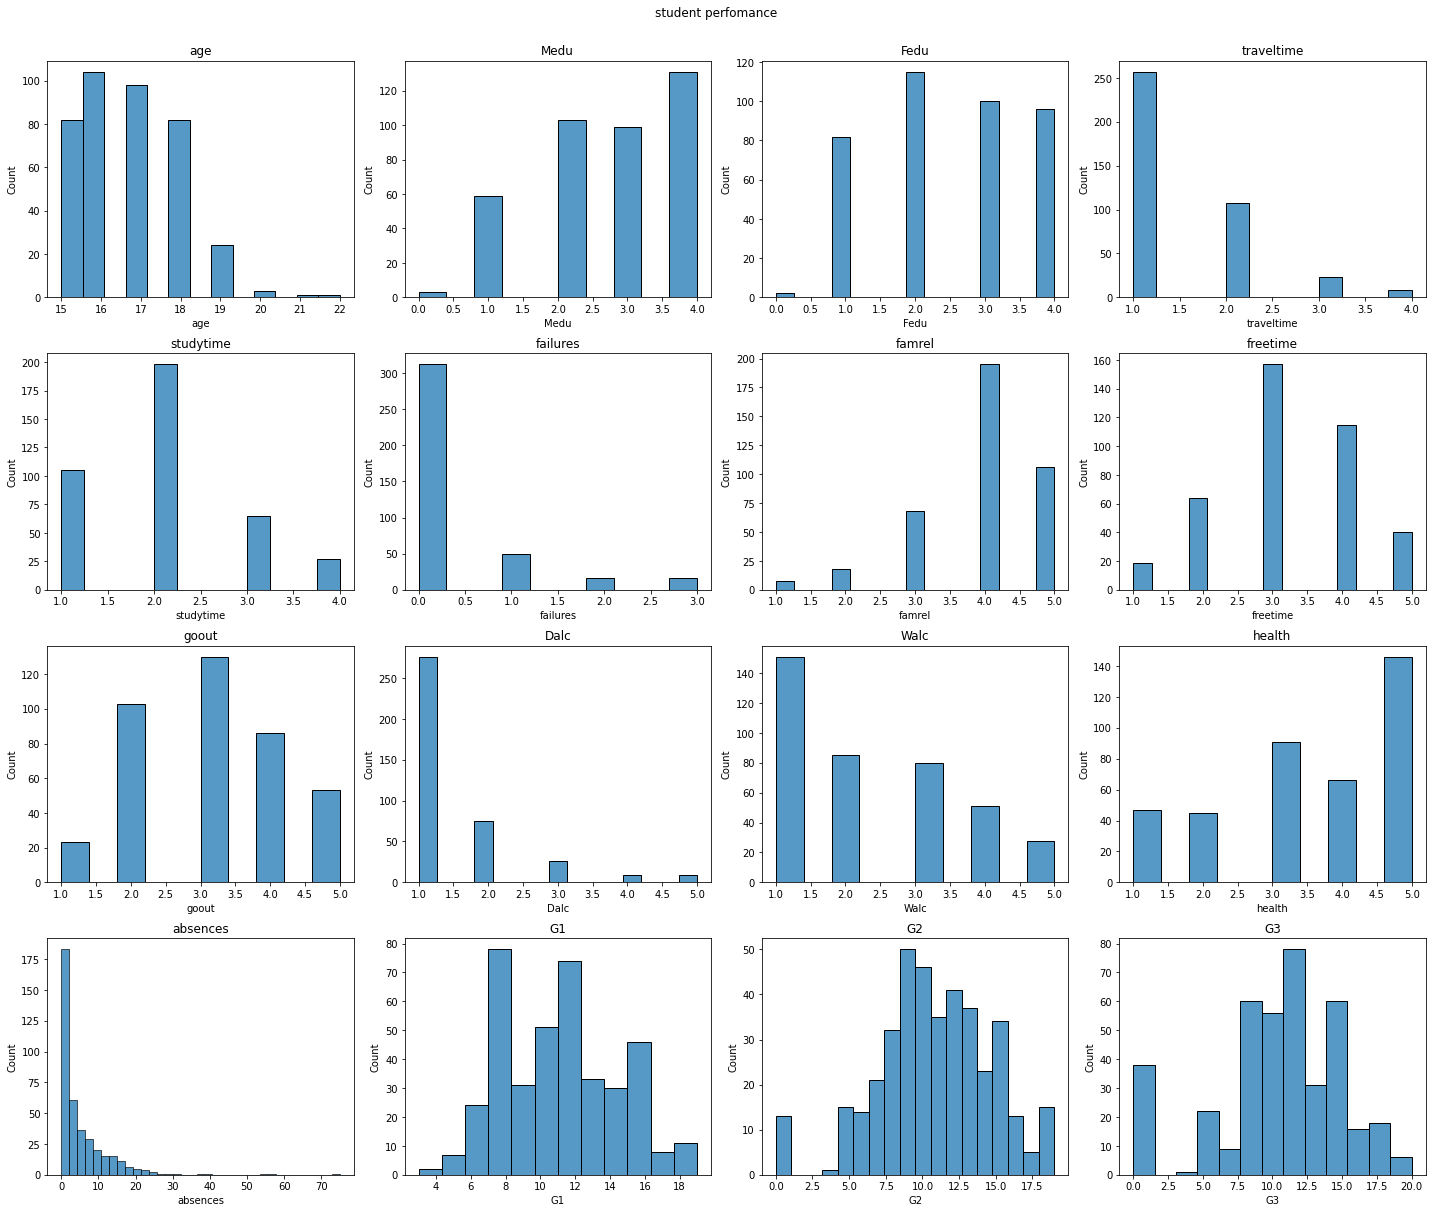

In [ ]:
#hissplot in numeric features
from matplotlib.pyplot import figure
fig = plt.figure(figsize = (20, 25))
j = 0
for i in range(len(numer_features)):
    ax = plt.subplot(6, 4, j+1)
    j += 1
    sns.histplot(ax=ax,x=numer_features[i],data=data)
    plt.title(numer_features[i])
fig.suptitle('student perfomance')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()



Text(0.5, 1.0, 'Student grades count')

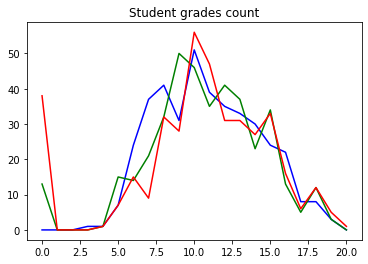

In [ ]:
y1, ed1 = np.histogram(data['G1'], bins = np.arange(0,22)-0.5)
cen1 = 0.5*(ed1[1:]+ed1[:-1])
plt.plot(cen1, y1, '-', c='blue', label='G1')
y2, ed2 = np.histogram(data['G2'], bins = np.arange(0,22)-0.5)
cen2 = 0.5*(ed2[1:]+ed2[:-1])
plt.plot(cen2, y2, '-', c='green', label='G2')
y3, ed3 = np.histogram(data['G3'], bins = np.arange(0,22)-0.5)
cen3 = 0.5*(ed3[1:]+ed3[:-1])
plt.plot(cen3, y3, '-', c='red', label='G3')
plt.title("Student grades count")

###Corr heatmap

In [ ]:
data2 = pd.DataFrame(columns=data.columns)
for col in data.columns:
  if (data[col].dtype=='object'):
    data2[col] = pd.factorize(data[col], sort=True)[0]
  else:
    data2[col] = data[col]

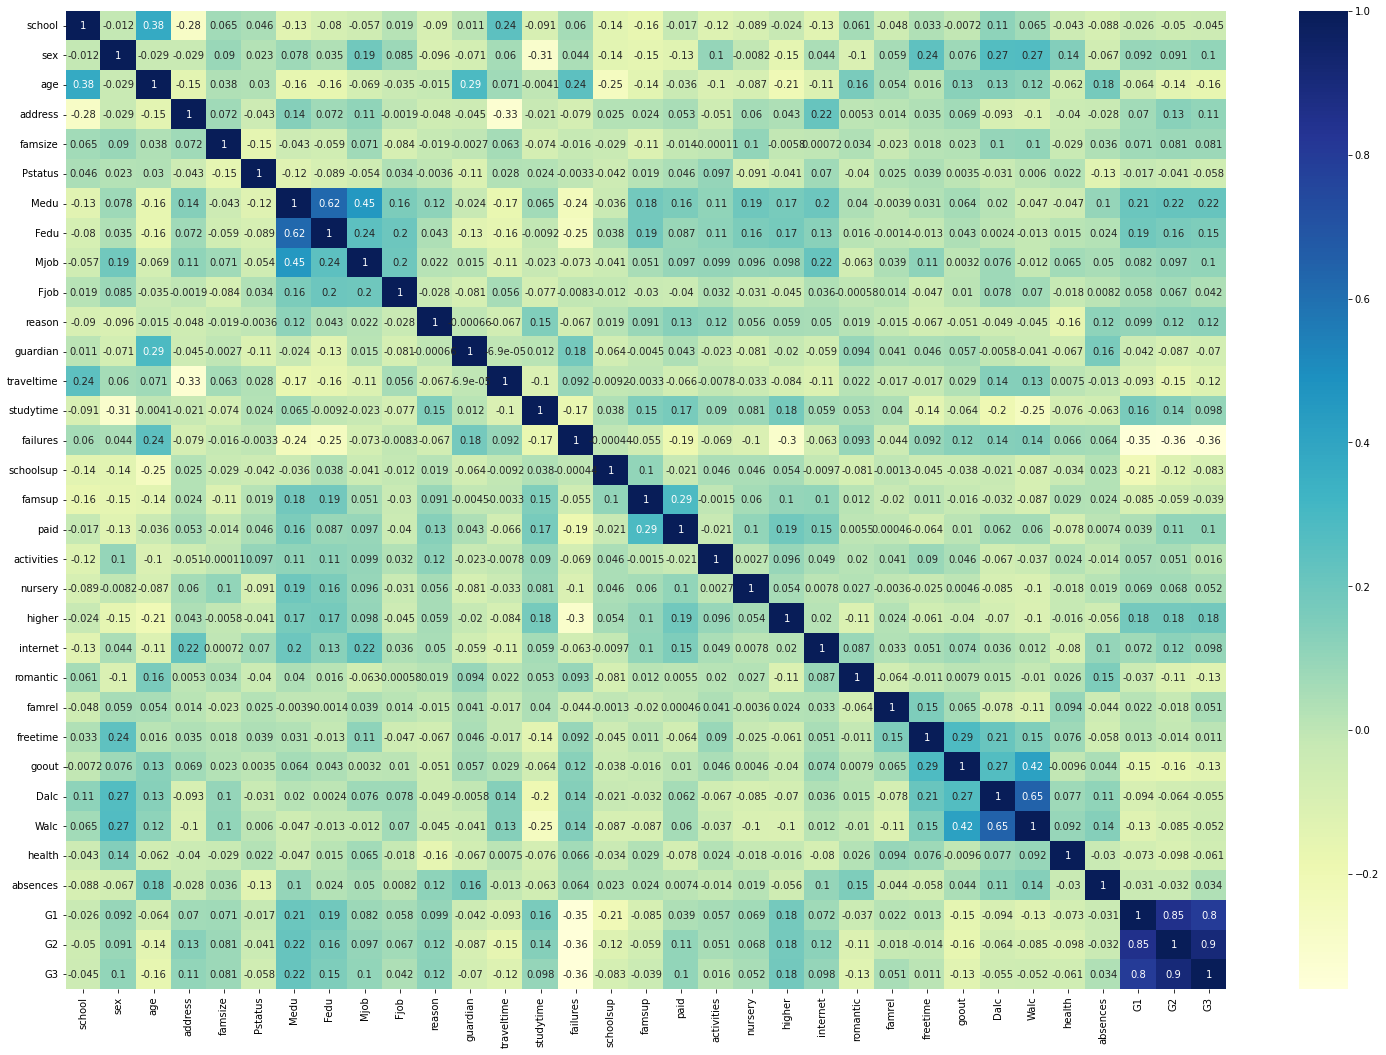

In [ ]:
plt.figure(figsize=(26,18))
sns.heatmap(data2.corr(),cmap="YlGnBu", annot=True)